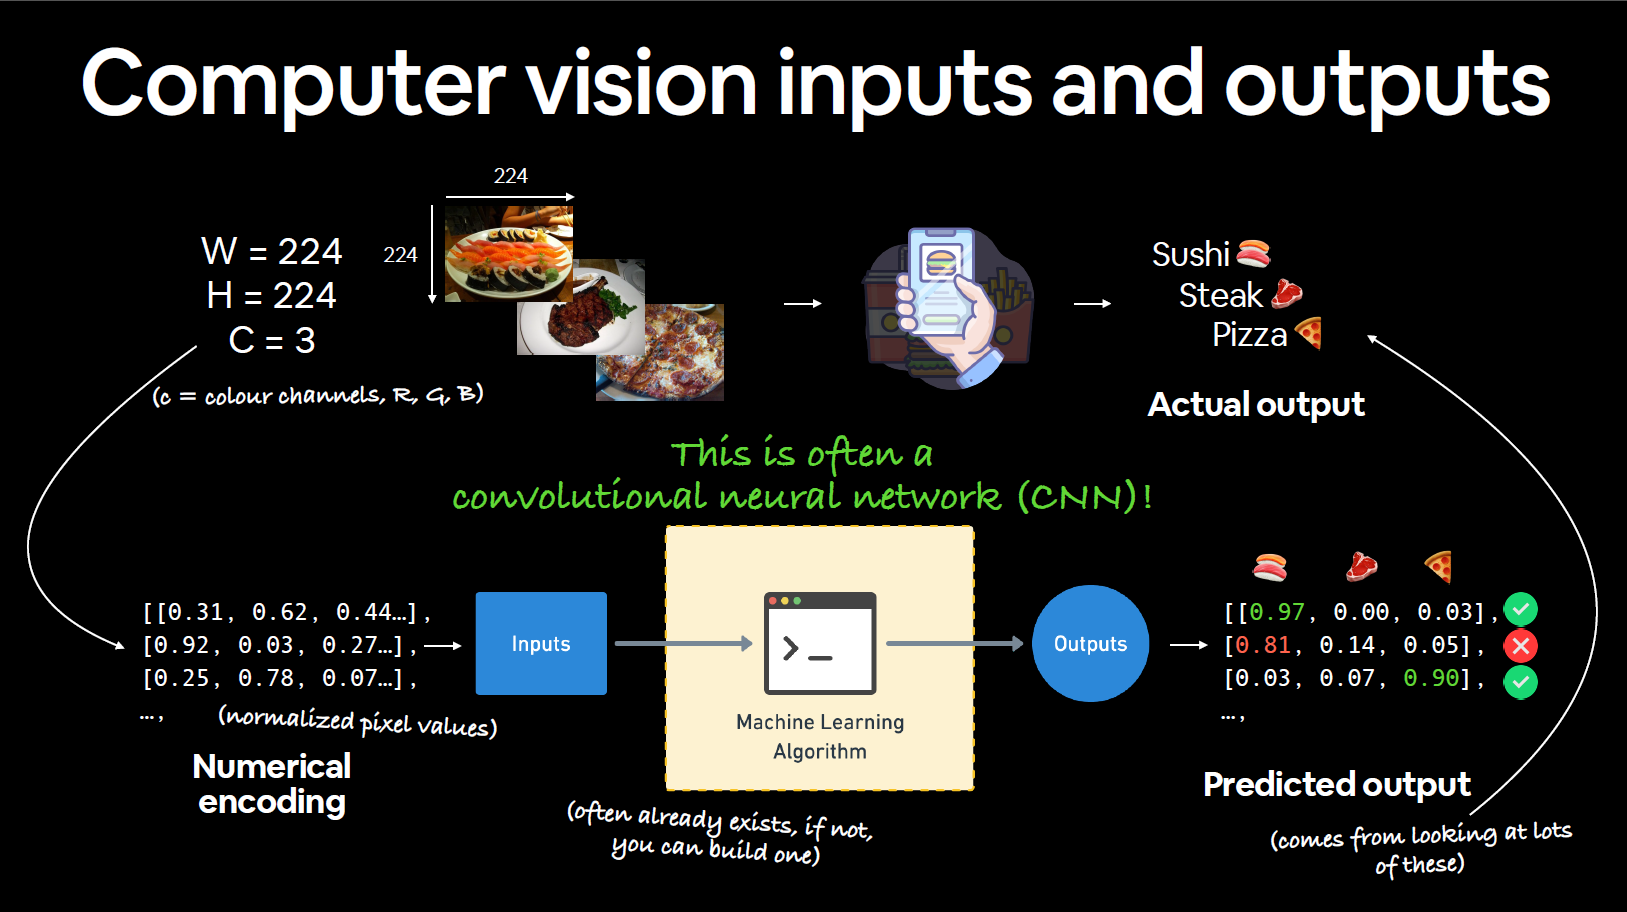

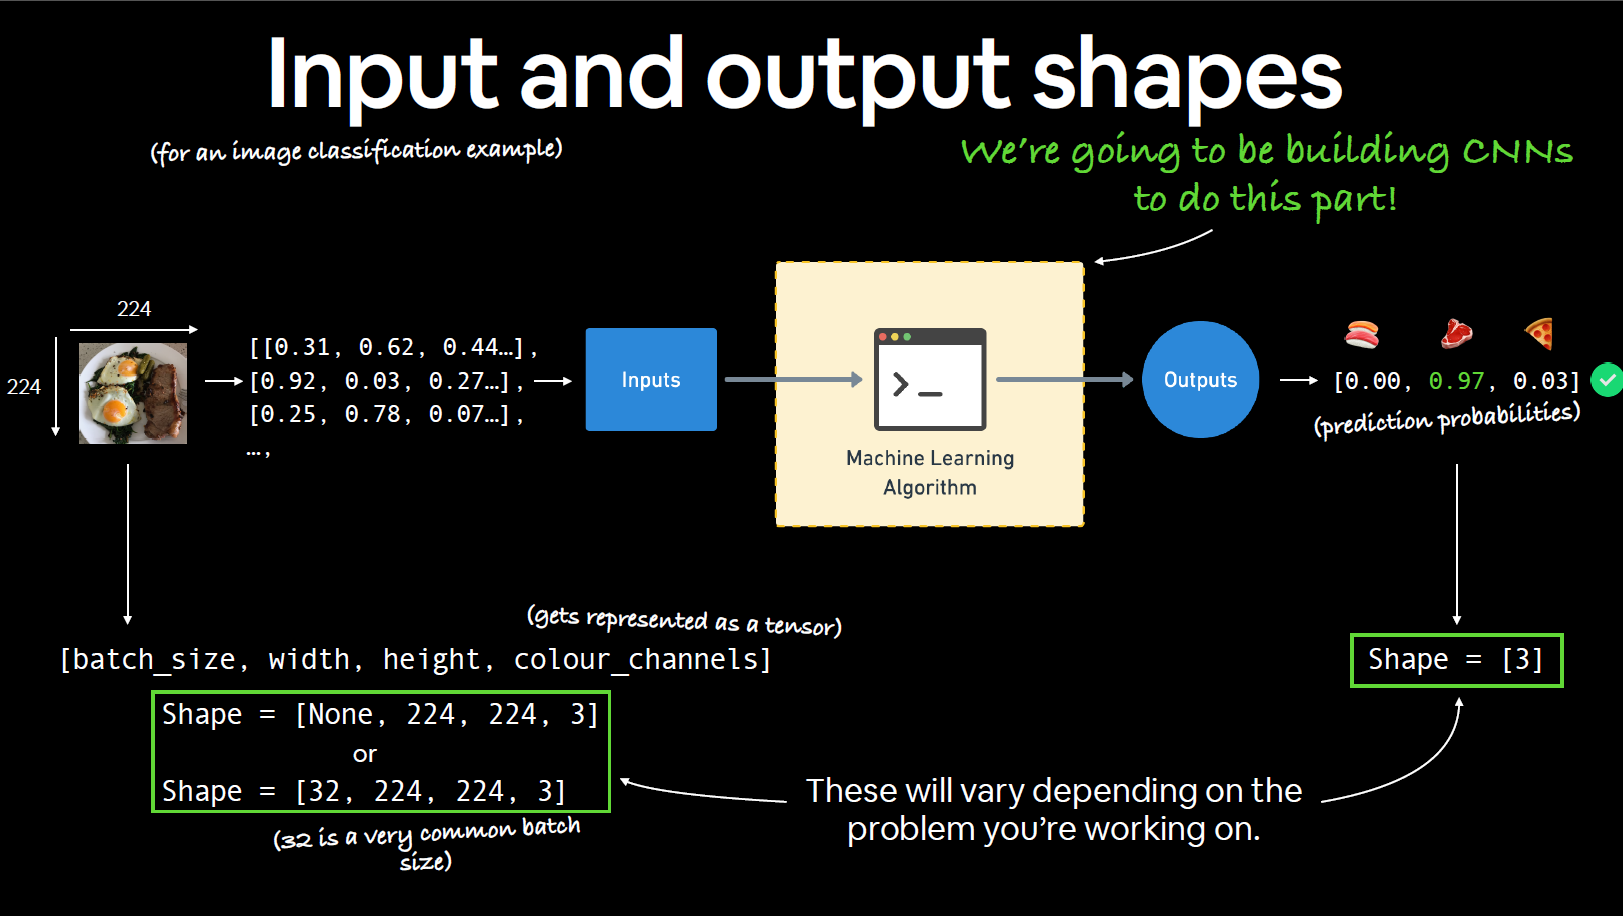

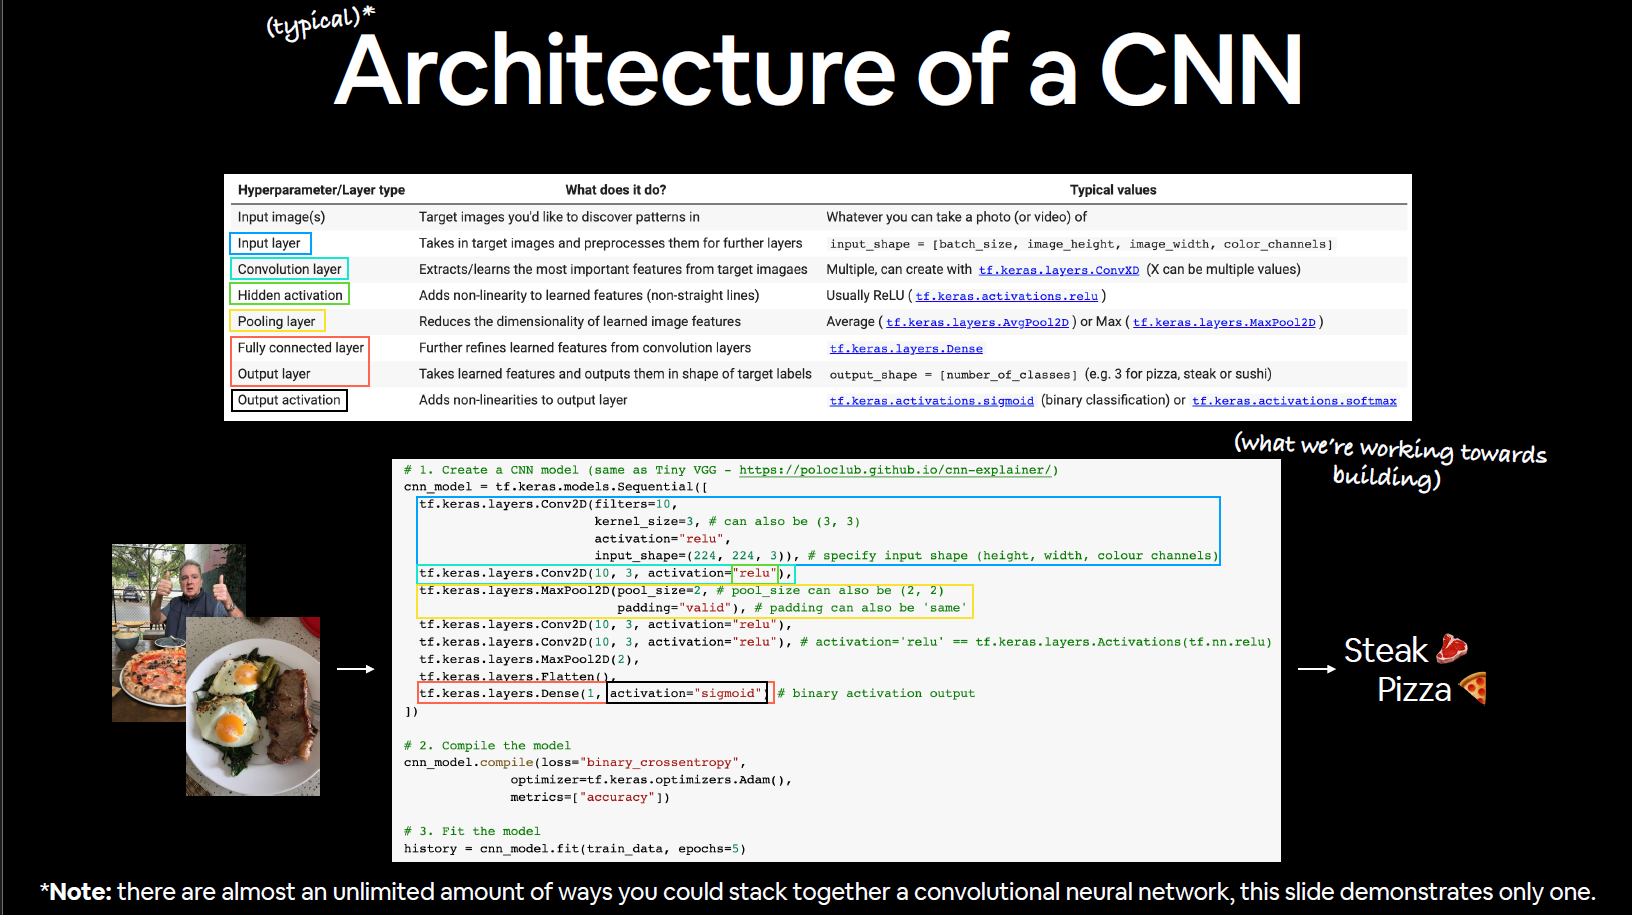

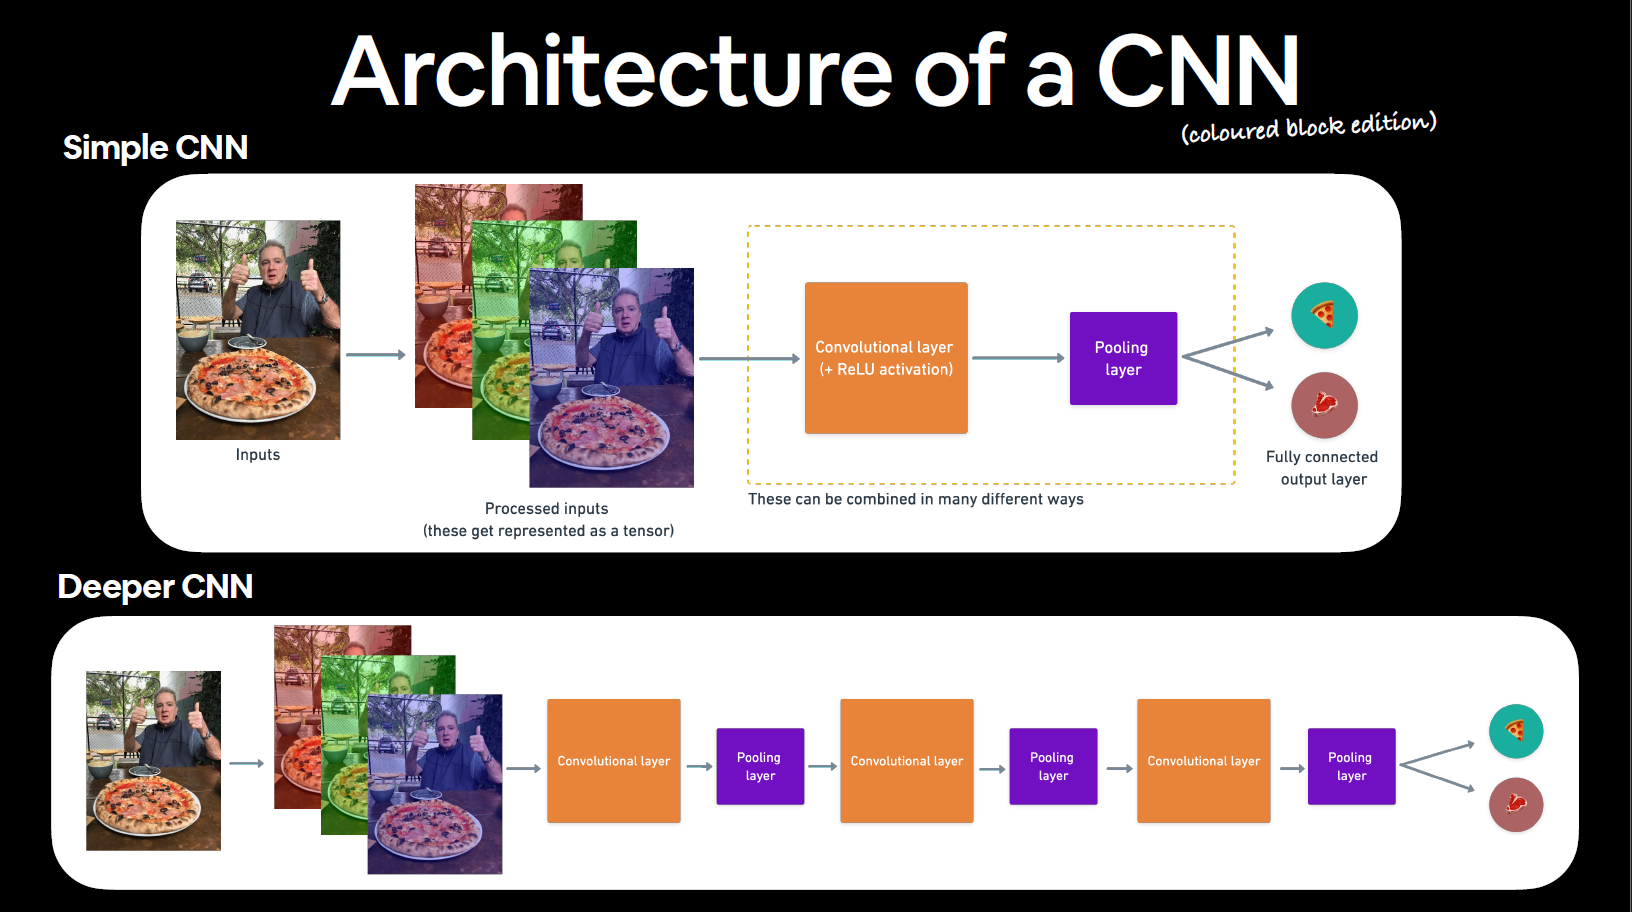

# Get the Data
The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-06-22 11:57:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.0MB/s    in 5.9s    

2024-06-22 11:57:30 (17.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os

# walk throught the pizza_steak direactory and list the number of iles
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .
There are 2 directories and 0 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .


In [ ]:
# Another way to find the number of images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # read the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


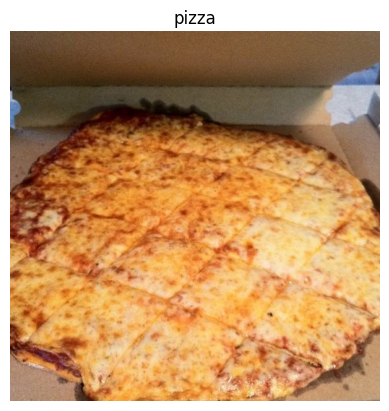

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class="pizza")

In [ ]:
# view the image shape
img.shape   # returns width, height and color chanels

(512, 512, 3)

Looking at the image shape more closely, you'll see it's in the form (Width, Height, Colour Channels).

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

You'll notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [ ]:
# Get all the pixel values between 0 and 1 (Scaling)
img/255

array([[[0.38431373, 0.30196078, 0.21960784],
        [0.4       , 0.31764706, 0.23529412],
        [0.38431373, 0.30196078, 0.21960784],
        ...,
        [0.55686275, 0.4627451 , 0.36862745],
        [0.49411765, 0.4       , 0.30588235],
        [0.4627451 , 0.36862745, 0.2745098 ]],

       [[0.35686275, 0.2745098 , 0.19215686],
        [0.37647059, 0.29411765, 0.21176471],
        [0.36862745, 0.28627451, 0.20392157],
        ...,
        [0.5254902 , 0.43137255, 0.3372549 ],
        [0.49411765, 0.4       , 0.30588235],
        [0.49019608, 0.39607843, 0.30196078]],

       [[0.37647059, 0.29411765, 0.21176471],
        [0.4       , 0.31764706, 0.23529412],
        [0.39607843, 0.31372549, 0.23137255],
        ...,
        [0.49019608, 0.39607843, 0.30196078],
        [0.50588235, 0.41176471, 0.31764706],
        [0.52941176, 0.43529412, 0.34117647]],

       ...,

       [[0.6627451 , 0.5254902 , 0.45098039],
        [0.68627451, 0.54901961, 0.4745098 ],
        [0.70588235, 0

## End-to-End Example
Let's build a convolutional neural network to find the patterns in our images. We need to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our data
* Compile our CNN
* Fit the CNN to our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# set tht seed
tf.random.set_seed(42)


# pre-process data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


# setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process in a time
                                               target_size=(224, 224),  # convert all images to be 224*224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


# create a CNN model (Same as Tiny VGG on the CNN Explainer Website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3, # can also be (3,3)
                           activation="relu",
                           input_shape=(224, 224, 3)), # first layer specifies input shape(height, width, colo chanels)
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,  # pool size can be (2,2)
                              padding="valid"),  # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation="relu" == tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation on the output layer
])


# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 129ms/step - loss: 0.5774 - accuracy: 0.7067 - val_loss: 0.4316 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 5s 104ms/step - loss: 0.4615 - accuracy: 0.7900 - val_loss: 0.4093 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.4283 - accuracy: 0.8180 - val_loss: 0.4549 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 5s 104ms/step - loss: 0.3763 - accuracy: 0.8360 - val_loss: 0.4051 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 5s 104ms/step - loss: 0.3197 - accuracy: 0.8613 - val_loss: 0.4437 - val_accuracy: 0.7860


Nice! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~85% accuaracy on the training set and ~85% accuracy on the test set).

However, our model only went through a binary classificaiton problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

In [ ]:
# check the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

# Trying a non-CNN model on our images data

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create a model to replicate the Tensorflow Playground Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 103ms/step - loss: 0.8288 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 102ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6932 - accuracy: 0.4720 - val_loss: 0.6931 - val_accuracy: 0.5000


Our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

Let's see the architecture.

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN model, model_2 performs terribly.

### Try and Improve Model_2

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_3 = model_3.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 106ms/step - loss: 1.8973 - accuracy: 0.6480 - val_loss: 1.0818 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 0.8297 - accuracy: 0.7387 - val_loss: 0.7633 - val_accuracy: 0.5920
Epoch 3/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6291 - accuracy: 0.7527 - val_loss: 1.1592 - val_accuracy: 0.5680
Epoch 4/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6697 - accuracy: 0.7567 - val_loss: 1.1885 - val_accuracy: 0.5160
Epoch 5/5
47/47 [==============================] - 5s 105ms/step - loss: 0.5105 - accuracy: 0.7720 - val_loss: 0.5112 - val_accuracy: 0.7480


In [ ]:
# look at the model_3 summary
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 100)               15052900  
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


our model is learning again. It got ~70% accuracy on the training set and ~70% accuracy on the validation set. So, this model has almost 550 times the parameters as our CNN but still underperforms. This is the power of CNN for Computer Vision.